![](images/title-background.png)
<img src="images/example.png" alt="Drawing" style="float: center; width: 90%;"/>
&nbsp;

&nbsp;

&nbsp;

In [1]:
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from ipywidgets import FloatProgress, HBox, VBox, HTML, Layout, Button, Box
from IPython.display import display
from utils import *
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

Using TensorFlow backend.


In [2]:
# =======================
#  PARITY DATA GENERATOR
# =======================

class ParitySequenceData(object):
    """ Generate sequences of parity data.
    This class generates samples for training, validation, and testing.

    Examples:
        [1, 1, 1, 0, 0, 1, 1, 1]
        [0, 0, 0, 0, 1, 0, 1, 0]
    """
    def __init__(self, n_samples=10000, seq_len=2, ndmin=2, seed=101):
        self.data = []
        self.labels = []
        self.batch_id = 0
        
        np.random.seed(seed)
        self.data = np.random.randint(0, 2, (n_samples, seq_len))
        self.labels = self.data.sum(axis=1, keepdims=True) % 2            
        
        # Expand dimensions if using a framework that expects a different data format
        if ndmin == 3:
            self.data = np.expand_dims(self.data, axis=2)

    def next(self, batch_size):
        """ Return a batch of data. When dataset end is reached, start over.
        """
        if self.batch_id == len(self.data):
            self.batch_id = 0
        
        batch_data = (self.data[self.batch_id:min(self.batch_id + batch_size, len(self.data))])
        batch_labels = (self.labels[self.batch_id:min(self.batch_id + batch_size, len(self.data))])
        self.batch_id = min(self.batch_id + batch_size, len(self.data))
        
        return batch_data, batch_labels
    
    def reset_batch(self):
        self.batch_id = 0

![](images/title-ann-10.png)
<img src="images/nn-10.png" alt="Drawing" style="float: center; width: 75%;"/>

In [3]:
# =======================
#  HYPERPARAMETERS
# =======================

seq_len = 10
hidden_units = [10]

n_samples_train = 10000
n_samples_test = 100
batch_size = 10
n_epochs_train = 10000
n_epochs_eval = 1
n_steps_train = 10000

In [4]:
X_train = ParitySequenceData(n_samples=n_samples_train, seq_len=seq_len)
X_test = ParitySequenceData(n_samples=n_samples_test, seq_len=seq_len)

### Define Feature Colums

In [5]:
feat_cols = [tf.feature_column.numeric_column('x',shape=(seq_len, 1))]

### Define Input Function

In [6]:
input_func = tf.estimator.inputs.numpy_input_fn({'x': X_train.data},y=X_train.labels,
                                                batch_size=batch_size,
                                                num_epochs=n_epochs_train,
                                                shuffle=True)

### Define Evaluation Function

In [7]:
eval_input_func = tf.estimator.inputs.numpy_input_fn({'x': X_test.data}, y=X_test.labels,
                                                     batch_size=batch_size,
                                                     num_epochs=n_epochs_eval,
                                                     shuffle=False)

### Build the Model

In [8]:
model = tf.estimator.DNNClassifier(hidden_units=hidden_units,
                                   feature_columns=feat_cols,
                                   n_classes=2,
                                   activation_fn=tf.nn.relu)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/jb/jsd15ynn7c7b2c1s8zl3zr380000gn/T/tmpyf9hia7k', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x10db2e9e8>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


### Train the Model

In [9]:
model.train(input_fn=input_func, steps=n_steps_train)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/jb/jsd15ynn7c7b2c1s8zl3zr380000gn/T/tmpyf9hia7k/model.ckpt.
INFO:tensorflow:loss = 9.90164, step = 1
INFO:tensorflow:global_step/sec: 863.26
INFO:tensorflow:loss = 6.68644, step = 101 (0.117 sec)
INFO:tensorflow:global_step/sec: 1239.97
INFO:tensorflow:loss = 6.58508, step = 201 (0.081 sec)
INFO:tensorflow:global_step/sec: 1229.82
INFO:tensorflow:loss = 6.97614, step = 301 (0.081 sec)
INFO:tensorflow:global_step/sec: 1318.39
INFO:tensorflow:loss = 7.02418, step = 401 (0.076 sec)
INFO:tensorflow:global_step/sec: 1337.79
INFO:tensorflow:loss = 7.45818, step = 501 (0.075 sec)
INFO:tensorflow:global_step/sec: 1090.47
INFO:tensorflow:loss = 7.10576, step = 601 (0.092 sec)
INFO:tensorflow:global_step/sec: 1260.63
INFO:tensorflow:loss = 7.35024, step = 701 (0.079 sec)
INFO:tensorflow:global_step/sec: 1370.79
INFO:tensorflow:loss = 6.96698, step = 801 (0.073 sec)
INFO:tensorflow:global_step/s

INFO:tensorflow:global_step/sec: 1349.44
INFO:tensorflow:loss = 5.9977, step = 8401 (0.074 sec)
INFO:tensorflow:global_step/sec: 1302.46
INFO:tensorflow:loss = 5.46251, step = 8501 (0.077 sec)
INFO:tensorflow:global_step/sec: 1367.44
INFO:tensorflow:loss = 6.48423, step = 8601 (0.073 sec)
INFO:tensorflow:global_step/sec: 1210.3
INFO:tensorflow:loss = 6.06062, step = 8701 (0.083 sec)
INFO:tensorflow:global_step/sec: 1072.2
INFO:tensorflow:loss = 5.71857, step = 8801 (0.093 sec)
INFO:tensorflow:global_step/sec: 1121.63
INFO:tensorflow:loss = 6.20702, step = 8901 (0.089 sec)
INFO:tensorflow:global_step/sec: 1142.44
INFO:tensorflow:loss = 6.60527, step = 9001 (0.088 sec)
INFO:tensorflow:global_step/sec: 1147.68
INFO:tensorflow:loss = 6.00586, step = 9101 (0.087 sec)
INFO:tensorflow:global_step/sec: 1126.09
INFO:tensorflow:loss = 6.14091, step = 9201 (0.088 sec)
INFO:tensorflow:global_step/sec: 1065.75
INFO:tensorflow:loss = 7.53577, step = 9301 (0.094 sec)
INFO:tensorflow:global_step/sec: 

### Evaluate the Model

INFO:tensorflow:Starting evaluation at 2018-01-11-02:34:38
INFO:tensorflow:Restoring parameters from /var/folders/jb/jsd15ynn7c7b2c1s8zl3zr380000gn/T/tmpyf9hia7k/model.ckpt-10000
INFO:tensorflow:Finished evaluation at 2018-01-11-02:34:39
INFO:tensorflow:Saving dict for global step 10000: accuracy = 0.69, accuracy_baseline = 0.53, auc = 0.721799, auc_precision_recall = 0.714024, average_loss = 0.63864, global_step = 10000, label/mean = 0.53, loss = 6.3864, prediction/mean = 0.496917


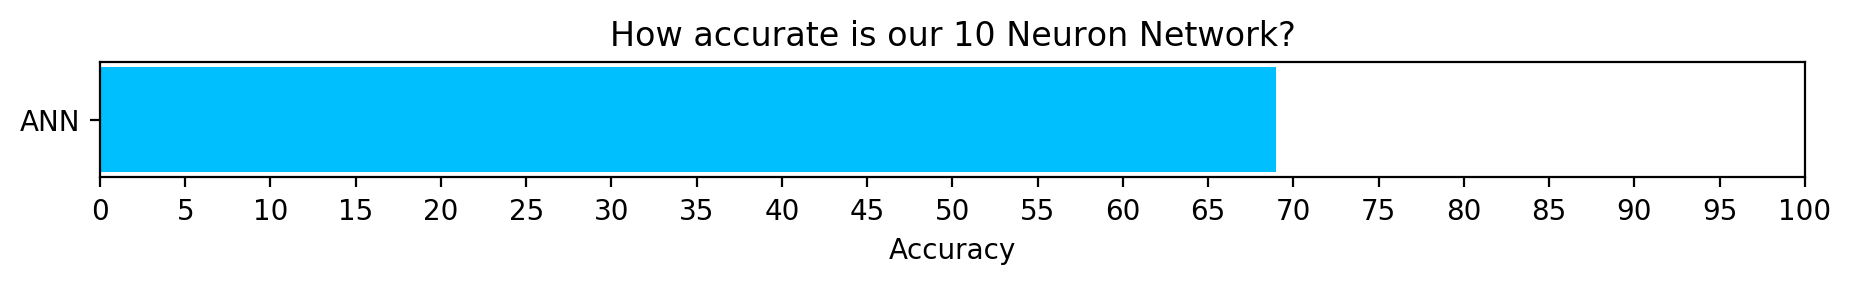

In [10]:
# Evaluate the model
results = model.evaluate(eval_input_func)

# Display the accuracy
display_accuracy('10', results['accuracy'])

![](images/title-ann-10x10.png)
<img src="images/nn-10x10.png" alt="Drawing" style="float: center; width: 75%;"/>

In [11]:
# =======================
#  HYPERPARAMETERS
# =======================

hidden_units = [10, 10]

### Build the Model with 2 hidden layers with 10 neurons each

In [12]:
model = tf.estimator.DNNClassifier(hidden_units=hidden_units,
                                   feature_columns=feat_cols,
                                   n_classes=2,
                                   activation_fn=tf.nn.relu)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/jb/jsd15ynn7c7b2c1s8zl3zr380000gn/T/tmpb1momtru', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1136e11d0>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


### Train the Model

In [13]:
model.train(input_fn=input_func, steps=n_steps_train)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/jb/jsd15ynn7c7b2c1s8zl3zr380000gn/T/tmpb1momtru/model.ckpt.
INFO:tensorflow:loss = 6.36391, step = 1
INFO:tensorflow:global_step/sec: 836.919
INFO:tensorflow:loss = 6.75547, step = 101 (0.120 sec)
INFO:tensorflow:global_step/sec: 1241.41
INFO:tensorflow:loss = 6.83422, step = 201 (0.081 sec)
INFO:tensorflow:global_step/sec: 857.605
INFO:tensorflow:loss = 6.7374, step = 301 (0.122 sec)
INFO:tensorflow:global_step/sec: 787.886
INFO:tensorflow:loss = 6.97049, step = 401 (0.122 sec)
INFO:tensorflow:global_step/sec: 1056.87
INFO:tensorflow:loss = 6.80434, step = 501 (0.095 sec)
INFO:tensorflow:global_step/sec: 934.685
INFO:tensorflow:loss = 6.49926, step = 601 (0.107 sec)
INFO:tensorflow:global_step/sec: 1187.44
INFO:tensorflow:loss = 7.10082, step = 701 (0.084 sec)
INFO:tensorflow:global_step/sec: 1190.35
INFO:tensorflow:loss = 6.78761, step = 801 (0.084 sec)
INFO:tensorflow:global_step/s

INFO:tensorflow:global_step/sec: 1241.48
INFO:tensorflow:loss = 2.70124, step = 8401 (0.080 sec)
INFO:tensorflow:global_step/sec: 1220.24
INFO:tensorflow:loss = 1.94598, step = 8501 (0.082 sec)
INFO:tensorflow:global_step/sec: 1298.37
INFO:tensorflow:loss = 2.97722, step = 8601 (0.077 sec)
INFO:tensorflow:global_step/sec: 1364.96
INFO:tensorflow:loss = 3.17661, step = 8701 (0.073 sec)
INFO:tensorflow:global_step/sec: 1217.49
INFO:tensorflow:loss = 2.88243, step = 8801 (0.082 sec)
INFO:tensorflow:global_step/sec: 1253.12
INFO:tensorflow:loss = 2.73503, step = 8901 (0.080 sec)
INFO:tensorflow:global_step/sec: 1248.82
INFO:tensorflow:loss = 3.96227, step = 9001 (0.080 sec)
INFO:tensorflow:global_step/sec: 1223.91
INFO:tensorflow:loss = 2.84482, step = 9101 (0.081 sec)
INFO:tensorflow:global_step/sec: 1222.63
INFO:tensorflow:loss = 2.49942, step = 9201 (0.082 sec)
INFO:tensorflow:global_step/sec: 1306.11
INFO:tensorflow:loss = 1.77186, step = 9301 (0.076 sec)
INFO:tensorflow:global_step/se

### Evaluate the Model

INFO:tensorflow:Starting evaluation at 2018-01-11-02:35:04
INFO:tensorflow:Restoring parameters from /var/folders/jb/jsd15ynn7c7b2c1s8zl3zr380000gn/T/tmpb1momtru/model.ckpt-10000
INFO:tensorflow:Finished evaluation at 2018-01-11-02:35:05
INFO:tensorflow:Saving dict for global step 10000: accuracy = 0.92, accuracy_baseline = 0.53, auc = 0.961863, auc_precision_recall = 0.972636, average_loss = 0.257792, global_step = 10000, label/mean = 0.53, loss = 2.57792, prediction/mean = 0.524394


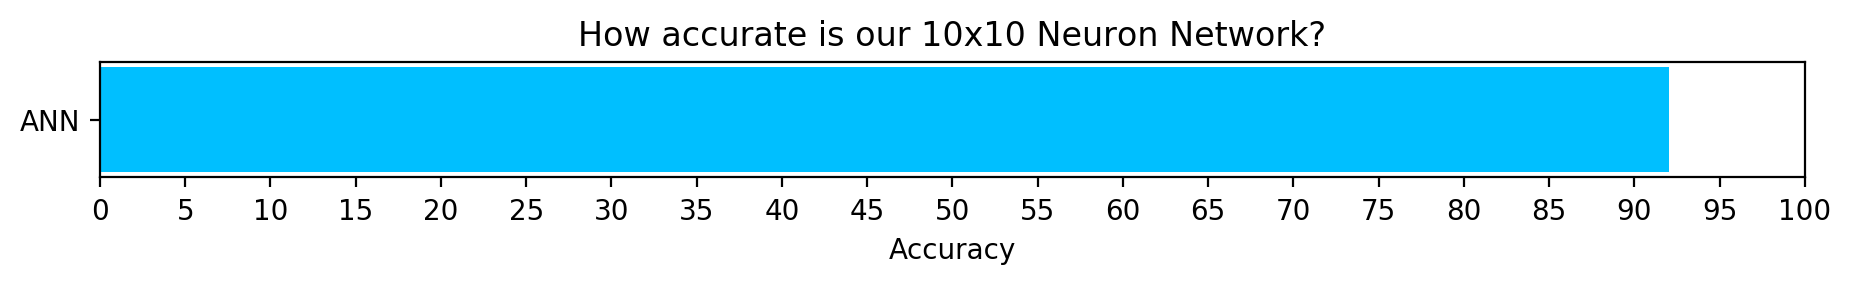

In [14]:
# Evaluate the model
results = model.evaluate(eval_input_func)

# Display the accuracy
display_accuracy('10x10', results['accuracy'])

![](images/title-ann-10x10x10.png)
<img src="images/nn-10x10x10.png" alt="Drawing" style="float: center; width: 75%;"/>

In [15]:
# =======================
#  HYPERPARAMETERS
# =======================

hidden_units = [10, 10, 10]

### Build the Model with 3 hidden layers with 10 neurons each

In [16]:
model = tf.estimator.DNNClassifier(hidden_units=hidden_units,
                                   feature_columns=feat_cols,
                                   n_classes=2,
                                   activation_fn=tf.nn.relu)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/jb/jsd15ynn7c7b2c1s8zl3zr380000gn/T/tmpmulflw4b', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x1026cb898>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


### Train the Model

In [17]:
model.train(input_fn=input_func, steps=n_steps_train)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/jb/jsd15ynn7c7b2c1s8zl3zr380000gn/T/tmpmulflw4b/model.ckpt.
INFO:tensorflow:loss = 7.18606, step = 1
INFO:tensorflow:global_step/sec: 810.326
INFO:tensorflow:loss = 6.83136, step = 101 (0.124 sec)
INFO:tensorflow:global_step/sec: 1275.06
INFO:tensorflow:loss = 6.87653, step = 201 (0.078 sec)
INFO:tensorflow:global_step/sec: 1176.84
INFO:tensorflow:loss = 6.91967, step = 301 (0.085 sec)
INFO:tensorflow:global_step/sec: 1244.48
INFO:tensorflow:loss = 6.98306, step = 401 (0.080 sec)
INFO:tensorflow:global_step/sec: 1208.52
INFO:tensorflow:loss = 6.90923, step = 501 (0.083 sec)
INFO:tensorflow:global_step/sec: 1147.3
INFO:tensorflow:loss = 6.94218, step = 601 (0.087 sec)
INFO:tensorflow:global_step/sec: 1182.02
INFO:tensorflow:loss = 6.93075, step = 701 (0.085 sec)
INFO:tensorflow:global_step/sec: 1214.93
INFO:tensorflow:loss = 6.99251, step = 801 (0.082 sec)
INFO:tensorflow:global_step/s

INFO:tensorflow:global_step/sec: 1006
INFO:tensorflow:loss = 1.89001, step = 8401 (0.099 sec)
INFO:tensorflow:global_step/sec: 1106.98
INFO:tensorflow:loss = 1.84459, step = 8501 (0.091 sec)
INFO:tensorflow:global_step/sec: 989.304
INFO:tensorflow:loss = 0.833943, step = 8601 (0.101 sec)
INFO:tensorflow:global_step/sec: 973.482
INFO:tensorflow:loss = 1.32126, step = 8701 (0.102 sec)
INFO:tensorflow:global_step/sec: 986.456
INFO:tensorflow:loss = 2.48576, step = 8801 (0.102 sec)
INFO:tensorflow:global_step/sec: 976.448
INFO:tensorflow:loss = 2.15441, step = 8901 (0.102 sec)
INFO:tensorflow:global_step/sec: 1002.29
INFO:tensorflow:loss = 0.628986, step = 9001 (0.100 sec)
INFO:tensorflow:global_step/sec: 1024.72
INFO:tensorflow:loss = 1.80563, step = 9101 (0.097 sec)
INFO:tensorflow:global_step/sec: 1003.05
INFO:tensorflow:loss = 2.59685, step = 9201 (0.099 sec)
INFO:tensorflow:global_step/sec: 977.814
INFO:tensorflow:loss = 2.13951, step = 9301 (0.103 sec)
INFO:tensorflow:global_step/sec

### Evaluate the Model

INFO:tensorflow:Starting evaluation at 2018-01-11-02:35:28
INFO:tensorflow:Restoring parameters from /var/folders/jb/jsd15ynn7c7b2c1s8zl3zr380000gn/T/tmpmulflw4b/model.ckpt-10000
INFO:tensorflow:Finished evaluation at 2018-01-11-02:35:29
INFO:tensorflow:Saving dict for global step 10000: accuracy = 0.91, accuracy_baseline = 0.53, auc = 0.984946, auc_precision_recall = 0.988787, average_loss = 0.192663, global_step = 10000, label/mean = 0.53, loss = 1.92663, prediction/mean = 0.533703


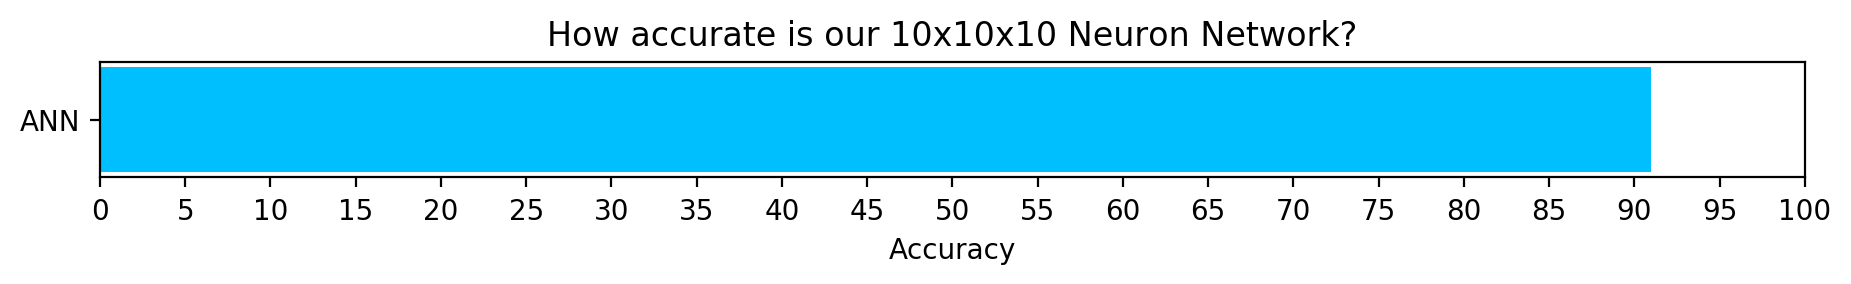

In [18]:
# Evaluate the model
results = model.evaluate(eval_input_func)

# Display the accuracy
display_accuracy('10x10x10', results['accuracy'])

![](images/title-ann-6-layers.png)
<img src="images/nn-6-layers.png" alt="Drawing" style="float: center; width: 100%;"/>

In [19]:
# =======================
#  HYPERPARAMETERS
# =======================

hidden_units = [10, 10, 10, 10, 10, 10]

### Build the Model with 4 hidden layers with 10 neurons each

In [20]:
model = tf.estimator.DNNClassifier(hidden_units=hidden_units,
                                   feature_columns=feat_cols,
                                   n_classes=2,
                                   activation_fn=tf.nn.relu)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/jb/jsd15ynn7c7b2c1s8zl3zr380000gn/T/tmpkom2kqxg', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x10eeed278>, '_task_type': 'worker', '_task_id': 0, '_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


### Train the Model

In [21]:
model.train(input_fn=input_func, steps=n_steps_train)

INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/jb/jsd15ynn7c7b2c1s8zl3zr380000gn/T/tmpkom2kqxg/model.ckpt.
INFO:tensorflow:loss = 6.88311, step = 1
INFO:tensorflow:global_step/sec: 692.215
INFO:tensorflow:loss = 6.92146, step = 101 (0.145 sec)
INFO:tensorflow:global_step/sec: 1098.26
INFO:tensorflow:loss = 6.9339, step = 201 (0.091 sec)
INFO:tensorflow:global_step/sec: 1130.8
INFO:tensorflow:loss = 6.91357, step = 301 (0.088 sec)
INFO:tensorflow:global_step/sec: 1110.34
INFO:tensorflow:loss = 6.89261, step = 401 (0.090 sec)
INFO:tensorflow:global_step/sec: 1108.65
INFO:tensorflow:loss = 6.93536, step = 501 (0.090 sec)
INFO:tensorflow:global_step/sec: 1109.66
INFO:tensorflow:loss = 6.93807, step = 601 (0.090 sec)
INFO:tensorflow:global_step/sec: 1105.23
INFO:tensorflow:loss = 6.87806, step = 701 (0.090 sec)
INFO:tensorflow:global_step/sec: 1135.48
INFO:tensorflow:loss = 6.89149, step = 801 (0.088 sec)
INFO:tensorflow:global_step/se

INFO:tensorflow:global_step/sec: 845.936
INFO:tensorflow:loss = 0.0102793, step = 8301 (0.118 sec)
INFO:tensorflow:global_step/sec: 849.806
INFO:tensorflow:loss = 0.13614, step = 8401 (0.118 sec)
INFO:tensorflow:global_step/sec: 1034.56
INFO:tensorflow:loss = 0.138119, step = 8501 (0.096 sec)
INFO:tensorflow:global_step/sec: 1096.79
INFO:tensorflow:loss = 0.00443457, step = 8601 (0.091 sec)
INFO:tensorflow:global_step/sec: 1077.91
INFO:tensorflow:loss = 0.361501, step = 8701 (0.093 sec)
INFO:tensorflow:global_step/sec: 863.447
INFO:tensorflow:loss = 0.958592, step = 8801 (0.116 sec)
INFO:tensorflow:global_step/sec: 910.665
INFO:tensorflow:loss = 0.363402, step = 8901 (0.112 sec)
INFO:tensorflow:global_step/sec: 845.464
INFO:tensorflow:loss = 0.00548727, step = 9001 (0.117 sec)
INFO:tensorflow:global_step/sec: 857.685
INFO:tensorflow:loss = 0.000673305, step = 9101 (0.116 sec)
INFO:tensorflow:global_step/sec: 891.534
INFO:tensorflow:loss = 0.00043524, step = 9201 (0.113 sec)
INFO:tensor

### Evaluate the Model

INFO:tensorflow:Starting evaluation at 2018-01-11-02:36:08
INFO:tensorflow:Restoring parameters from /var/folders/jb/jsd15ynn7c7b2c1s8zl3zr380000gn/T/tmpkom2kqxg/model.ckpt-10000
INFO:tensorflow:Finished evaluation at 2018-01-11-02:36:09
INFO:tensorflow:Saving dict for global step 10000: accuracy = 1.0, accuracy_baseline = 0.53, auc = 1.0, auc_precision_recall = 1.0, average_loss = 0.0256762, global_step = 10000, label/mean = 0.53, loss = 0.256762, prediction/mean = 0.512385


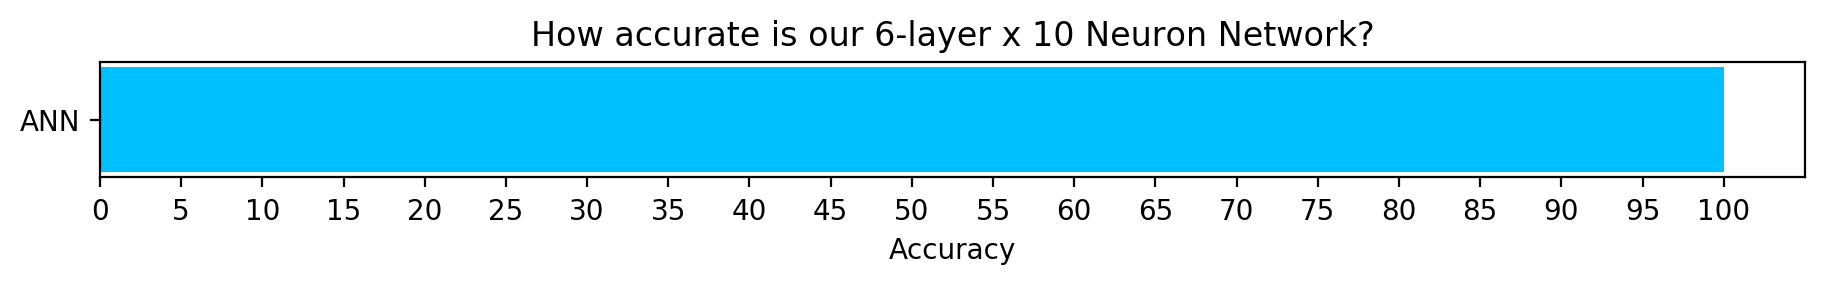

In [23]:
# Evaluate the model
results = model.evaluate(eval_input_func)

# Display the accuracy
display_accuracy('6-layer x 10', results['accuracy'])

![](images/title-lstm-1.png)
<img src="images/lstm-1-cell.png" alt="Drawing" style="float: center; height: 300px;"/>
![](images/title-lstm-unrolled.png)
<img src="images/lstm-1-unrolled.png" alt="Drawing" style="float: center; height: 400px;"/>

In [27]:
# =======================
#  HYPERPARAMETERS
# =======================

lstm_cells = 1
max_seq_length = 101
n_samples_train = 10000
n_samples_test = 100

n_classes = 1
input_dim = 1

### Build the Model

In [28]:
model = Sequential()
model.add(LSTM(lstm_cells, input_shape=(None, input_dim)))
model.add(Dense(n_classes, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

### Train the Model

In [29]:
widget_builder = WidgetBuilder()
learned_seq_widget = widget_builder.build_learned_seq_widget()
stats_widget = widget_builder.build_stats_widget()
display(learned_seq_widget)
display(stats_widget)

for seq_len in range(1, max_seq_length, 1):
    # Update the sequence being learned
    widget_builder.learned_seq.value += ' {}'.format(seq_len)
    
    # Generate random parity sequences of incrementing length
    X_train = ParitySequenceData(n_samples=n_samples_train, seq_len=seq_len, ndmin=3)
    X_test = ParitySequenceData(n_samples=n_samples_test, seq_len=seq_len, ndmin=3)

    while True:
        # Evaluate the model
        score = model.evaluate(X_test.data, X_test.labels, verbose=0)[1]
        
        # Stop training once accuracy reaches 100% for this sequence length
        if score == 1.0:
            break
        
        # Train the model
        h = model.fit(X_train.data, X_train.labels, epochs=1, validation_split=0.1, verbose=0)
        
        # Display the current loss and accuracy statistics
        h = h.history
        widget_builder.acc_bar.value = h['val_acc'][-1]
        widget_builder.loss_bar.value = h['val_loss'][-1]

Box(children=(Box(children=(Button(description='Learning Sequence', style=ButtonStyle(button_color='lightgreen', font_weight='bold')),), layout=Layout(display='flex', flex='0 0 auto', flex_flow='row', width='150px')), HTML(value='')), layout=Layout(align_content='flex-start', align_items='flex-start', display='flex', flex_flow='row', width='100%'))

Box(box_style='info', children=(HBox(children=(HTML(value='Accuracy'), FloatProgress(value=0.0, max=1.0))), HBox(children=(HTML(value='Loss'), FloatProgress(value=0.0, max=1.0)))), layout=Layout(align_items='stretch', border='1px solid #48A7F2', display='flex', flex_flow='row', justify_content='space-around', width='100%'))

&nbsp;

&nbsp;
![](images/title-infer-3.png)
<img src="images/example-3.png" alt="Drawing" style="float: left; height: 125px;"/>

In [33]:
# Specify a number sequence of 1s and 0s
num_seq = np.array([[[0], [1], [1]]])

# Print out the ground truth
echo_even_or_odd('Generated Sequence:', num_seq)

# Use the trained model to infer the class -- is the parity even or odd?
predicted_class = model.predict_classes(num_seq)

# Print out the ground truth and prediction
echo_even_or_odd('Prediction:',         predicted_class)

Generated Sequence:      EVEN number of 1s
Prediction:              EVEN number of 1s


&nbsp;

&nbsp;
![](images/title-infer-10.png)
<img src="images/example-10.png" alt="Drawing" style="float: left; height: 125px;"/>

In [35]:
# Specify a number sequence of 1s and 0s
num_seq = np.array([[[0], [1], [0], [1], [0], [1], [1], [0], [1], [0]]])

# Print out the ground truth
echo_even_or_odd('Generated Sequence:', num_seq)

# Use the trained model to infer the class -- is the parity even or odd?
predicted_class = model.predict_classes(num_seq)

# Print out the ground truth and prediction
echo_even_or_odd('Prediction:',         predicted_class)

Generated Sequence:      ODD number of 1s
Prediction:              ODD number of 1s


&nbsp;

&nbsp;
![](images/title-infer-10k.png)

In [32]:
# Specify a number sequence of 1s and 0s
num_seq = np.random.randint(0, 2, (1, 10000, 1))

# Print out the ground truth
echo_even_or_odd('Generated Sequence:', num_seq)

# Use the trained model to infer the class -- is the parity even or odd?
predicted_class = model.predict_classes(num_seq)

# Print out the prediction
echo_even_or_odd('Prediction:', predicted_class)

Generated Sequence:      EVEN number of 1s
Prediction:              EVEN number of 1s
